In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    #plt.show()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
print(X_train[1])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253 252 252  96 189 253 167   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 25

# **Layer 2 Architecture**

**Without Dropout and Batch Norm**

In [0]:
model_2layer=Sequential()
model_2layer.add(Dense(256,activation='relu',input_dim=input_dim,))
model_2layer.add(Dense(128,activation='relu'))
model_2layer.add(Dense(output_dim,activation='softmax'))
model_2layer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_54 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_55 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_2layer.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_2layer.fit(X_train,Y_train,batch_size=batch_size,verbose=1,epochs=nb_epoch,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 4s 68us/step - loss: 0.2720 - acc: 0.9219 - val_loss: 0.1321 - val_acc: 0.9601
Epoch 2/25
60000/60000 [==============================] - 3s 46us/step - loss: 0.1038 - acc: 0.9686 - val_loss: 0.0940 - val_acc: 0.9709
Epoch 3/25
60000/60000 [==============================] - 3s 46us/step - loss: 0.0671 - acc: 0.9794 - val_loss: 0.0883 - val_acc: 0.9745
Epoch 4/25
60000/60000 [==============================] - 3s 46us/step - loss: 0.0483 - acc: 0.9854 - val_loss: 0.0854 - val_acc: 0.9753
Epoch 5/25
60000/60000 [==============================] - 3s 46us/step - loss: 0.0364 - acc: 0.9885 - val_loss: 0.0682 - val_acc: 0.9800
Epoch 6/25
60000/60000 [==============================] - 3s 47us/step - loss: 0.0260 - acc: 0.9920 - val_loss: 0.0707 - val_acc: 0.9790
Epoch 7/25
60000/60000 [==============================] - 3s 46us/step - loss: 0.0224 - acc: 0.9927 - val_loss: 0.0787 - val_acc

In [0]:
score = model_2layer.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.08952387685645236
Test accuracy: 0.9832


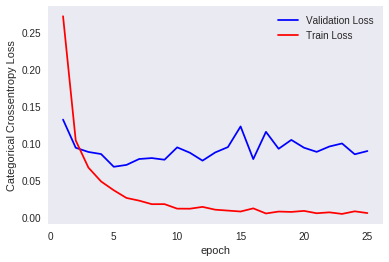

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Thus , our validation loss is far more than training loss in this architecture and setting.

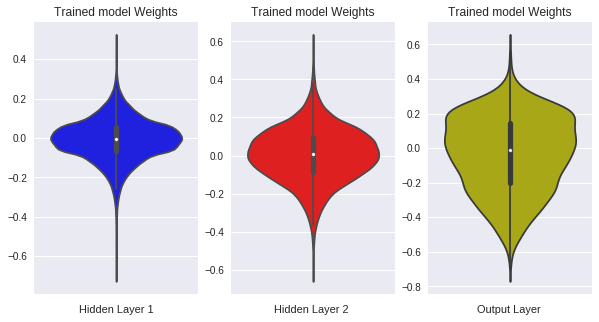

In [0]:
w_after = model_2layer.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**With Batch Norm and without Dropout**

In [0]:
model_2layer=Sequential()
model_2layer.add(Dense(256,activation='relu',input_dim=input_dim,))
model_2layer.add(BatchNormalization())
model_2layer.add(Dense(128,activation='relu'))
model_2layer.add(BatchNormalization())
model_2layer.add(Dense(output_dim,activation='softmax'))
model_2layer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_26 (Batc (None, 256)               1024      
_________________________________________________________________
dense_57 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_27 (Batc (None, 128)               512       
_________________________________________________________________
dense_58 (Dense)             (None, 10)                1290      
Total params: 236,682
Trainable params: 235,914
Non-trainable params: 768
_________________________________________________________________


In [0]:
model_2layer.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_2layer.fit(X_train,Y_train,batch_size=batch_size,verbose=1,epochs=nb_epoch,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 108us/step - loss: 0.2060 - acc: 0.9391 - val_loss: 0.1102 - val_acc: 0.9661
Epoch 2/25
60000/60000 [==============================] - 4s 75us/step - loss: 0.0782 - acc: 0.9757 - val_loss: 0.0885 - val_acc: 0.9719
Epoch 3/25
60000/60000 [==============================] - 5s 76us/step - loss: 0.0508 - acc: 0.9843 - val_loss: 0.0821 - val_acc: 0.9724
Epoch 4/25
60000/60000 [==============================] - 4s 75us/step - loss: 0.0365 - acc: 0.9886 - val_loss: 0.0744 - val_acc: 0.9775
Epoch 5/25
60000/60000 [==============================] - 5s 75us/step - loss: 0.0298 - acc: 0.9903 - val_loss: 0.0836 - val_acc: 0.9751
Epoch 6/25
60000/60000 [==============================] - 5s 75us/step - loss: 0.0247 - acc: 0.9920 - val_loss: 0.0715 - val_acc: 0.9801
Epoch 7/25
60000/60000 [==============================] - 4s 75us/step - loss: 0.0198 - acc: 0.9936 - val_loss: 0.0740 - val_ac

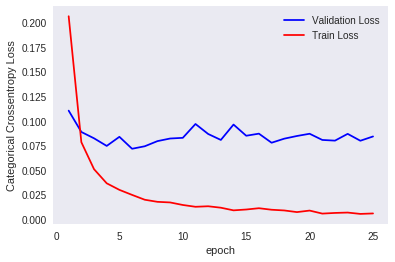

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

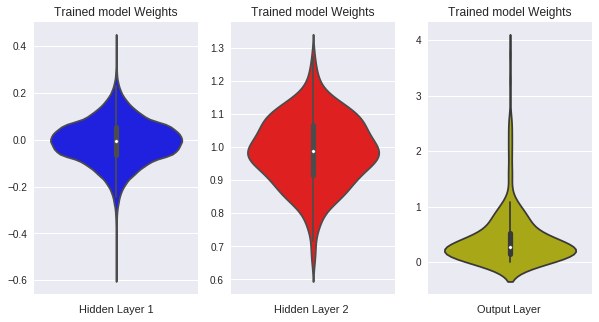

In [0]:
w_after = model_2layer.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Thus, we see that after adding batchnorm layer we get slightly better accuracy. Also, one thing to notice is that the weight distribution has changed for hidden layer 2 and output layer after applying batchnorm.

**With BatchNorm and Dropout**

In [0]:
model_2layer=Sequential()
model_2layer.add(Dense(256,activation='relu',input_dim=input_dim,))
model_2layer.add(BatchNormalization())
model_2layer.add(Dropout(0.5))
model_2layer.add(Dense(128,activation='relu'))
model_2layer.add(BatchNormalization())
model_2layer.add(Dropout(0.5))
model_2layer.add(Dense(output_dim,activation='softmax'))
model_2layer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_28 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_29 (Batc (None, 128)               512       
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 10)                1290      
Total para

In [0]:
model_2layer.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_2layer.fit(X_train,Y_train,batch_size=batch_size,verbose=1,epochs=nb_epoch,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 7s 114us/step - loss: 0.4945 - acc: 0.8497 - val_loss: 0.1751 - val_acc: 0.9456
Epoch 2/25
60000/60000 [==============================] - 5s 77us/step - loss: 0.2415 - acc: 0.9273 - val_loss: 0.1188 - val_acc: 0.9628
Epoch 3/25
60000/60000 [==============================] - 5s 78us/step - loss: 0.1950 - acc: 0.9419 - val_loss: 0.1012 - val_acc: 0.9674
Epoch 4/25
60000/60000 [==============================] - 5s 77us/step - loss: 0.1699 - acc: 0.9501 - val_loss: 0.0898 - val_acc: 0.9719
Epoch 5/25
60000/60000 [==============================] - 5s 78us/step - loss: 0.1474 - acc: 0.9549 - val_loss: 0.0787 - val_acc: 0.9755
Epoch 6/25
60000/60000 [==============================] - 5s 77us/step - loss: 0.1371 - acc: 0.9586 - val_loss: 0.0787 - val_acc: 0.9757
Epoch 7/25
60000/60000 [==============================] - 5s 78us/step - loss: 0.1245 - acc: 0.9620 - val_loss: 0.0771 - val_ac

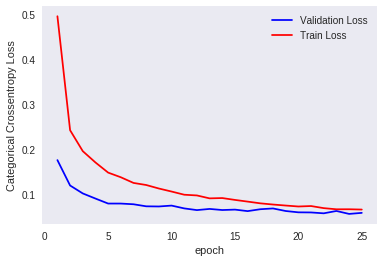

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

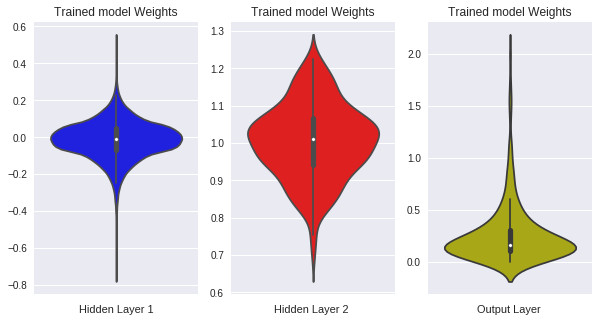

In [0]:
w_after = model_2layer.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Thus, after adding dropout we see that the train and validation loss are very close to each other. This is generally desired and indicates that our model is not overfitting.

# Layer 3 Architecture

**Without BatchNorm and Dropout**

In [0]:
model_3layer=Sequential()
model_3layer.add(Dense(256,activation='relu',input_dim=input_dim,))
model_3layer.add(Dense(128,activation='relu'))
model_3layer.add(Dense(64,activation='relu'))
model_3layer.add(Dense(output_dim,activation='softmax'))
model_3layer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_63 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_64 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_65 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_3layer.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history3=model_3layer.fit(X_train,Y_train,batch_size=batch_size,verbose=1,epochs=nb_epoch,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 5s 84us/step - loss: 0.2776 - acc: 0.9185 - val_loss: 0.1231 - val_acc: 0.9627
Epoch 2/25
60000/60000 [==============================] - 3s 51us/step - loss: 0.1016 - acc: 0.9685 - val_loss: 0.0847 - val_acc: 0.9735
Epoch 3/25
60000/60000 [==============================] - 3s 51us/step - loss: 0.0649 - acc: 0.9802 - val_loss: 0.0874 - val_acc: 0.9714
Epoch 4/25
60000/60000 [==============================] - 3s 51us/step - loss: 0.0476 - acc: 0.9847 - val_loss: 0.0850 - val_acc: 0.9738
Epoch 5/25
60000/60000 [==============================] - 3s 51us/step - loss: 0.0342 - acc: 0.9892 - val_loss: 0.0742 - val_acc: 0.9766
Epoch 6/25
60000/60000 [==============================] - 3s 51us/step - loss: 0.0281 - acc: 0.9912 - val_loss: 0.0776 - val_acc: 0.9784
Epoch 7/25
60000/60000 [==============================] - 3s 52us/step - loss: 0.0231 - acc: 0.9922 - val_loss: 0.0814 - val_acc

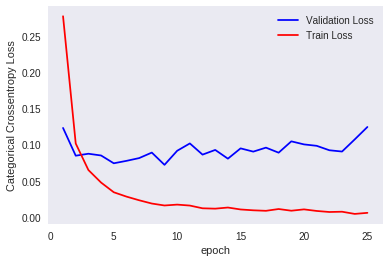

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history3.history['val_loss']
ty = history3.history['loss']
plt_dynamic(x, vy, ty, ax)

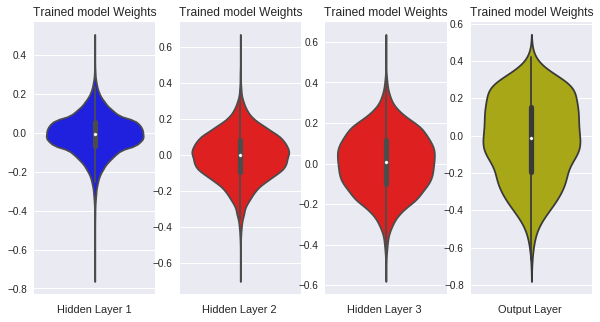

In [0]:
w_after = model_3layer.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**With BatchNorm and without Dropout**

In [0]:
model_3layer=Sequential()
model_3layer.add(Dense(256,activation='relu',input_dim=input_dim,))
model_3layer.add(BatchNormalization())
model_3layer.add(Dense(128,activation='relu'))
model_3layer.add(BatchNormalization())
model_3layer.add(Dense(64,activation='relu'))
model_3layer.add(BatchNormalization())
model_3layer.add(Dense(output_dim,activation='softmax'))
model_3layer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_30 (Batc (None, 256)               1024      
_________________________________________________________________
dense_67 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_31 (Batc (None, 128)               512       
_________________________________________________________________
dense_68 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_32 (Batc (None, 64)                256       
_________________________________________________________________
dense_69 (Dense)             (None, 10)                650       
Total para

In [0]:
model_3layer.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history3=model_3layer.fit(X_train,Y_train,batch_size=batch_size,verbose=1,epochs=nb_epoch,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 8s 140us/step - loss: 0.2306 - acc: 0.9319 - val_loss: 0.1174 - val_acc: 0.9643
Epoch 2/25
60000/60000 [==============================] - 6s 95us/step - loss: 0.0852 - acc: 0.9740 - val_loss: 0.0898 - val_acc: 0.9718
Epoch 3/25
60000/60000 [==============================] - 6s 95us/step - loss: 0.0573 - acc: 0.9822 - val_loss: 0.0883 - val_acc: 0.9725
Epoch 4/25
60000/60000 [==============================] - 6s 95us/step - loss: 0.0447 - acc: 0.9860 - val_loss: 0.0866 - val_acc: 0.9725
Epoch 5/25
60000/60000 [==============================] - 6s 95us/step - loss: 0.0334 - acc: 0.9893 - val_loss: 0.0819 - val_acc: 0.9733
Epoch 6/25
60000/60000 [==============================] - 6s 95us/step - loss: 0.0282 - acc: 0.9912 - val_loss: 0.0832 - val_acc: 0.9746
Epoch 7/25
60000/60000 [==============================] - 6s 95us/step - loss: 0.0235 - acc: 0.9923 - val_loss: 0.0850 - val_ac

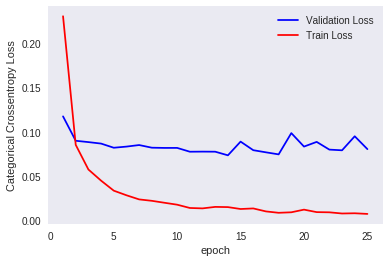

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history3.history['val_loss']
ty = history3.history['loss']
plt_dynamic(x, vy, ty, ax)

Thus, we get slightly better accuracy with batchnorm.

**With Batchnorm and Dropout**

In [0]:
model_3layer=Sequential()
model_3layer.add(Dense(256,activation='relu',input_dim=input_dim,))
model_3layer.add(BatchNormalization())
model_3layer.add(Dropout(0.5))
model_3layer.add(Dense(128,activation='relu'))
model_3layer.add(BatchNormalization())
model_3layer.add(Dropout(0.5))
model_3layer.add(Dense(64,activation='relu'))
model_3layer.add(BatchNormalization())
model_3layer.add(Dropout(0.5))
model_3layer.add(Dense(output_dim,activation='softmax'))
model_3layer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_33 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_34 (Batc (None, 128)               512       
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 64)                8256      
__________

In [0]:
model_3layer.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history3=model_3layer.fit(X_train,Y_train,batch_size=batch_size,verbose=1,epochs=nb_epoch,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 9s 152us/step - loss: 0.7513 - acc: 0.7689 - val_loss: 0.2062 - val_acc: 0.9390
Epoch 2/25
60000/60000 [==============================] - 6s 100us/step - loss: 0.3333 - acc: 0.9056 - val_loss: 0.1491 - val_acc: 0.9561
Epoch 3/25
60000/60000 [==============================] - 6s 101us/step - loss: 0.2659 - acc: 0.9253 - val_loss: 0.1348 - val_acc: 0.9599
Epoch 4/25
60000/60000 [==============================] - 6s 99us/step - loss: 0.2265 - acc: 0.9375 - val_loss: 0.1117 - val_acc: 0.9666
Epoch 5/25
60000/60000 [==============================] - 6s 99us/step - loss: 0.1987 - acc: 0.9449 - val_loss: 0.1026 - val_acc: 0.9712
Epoch 6/25
60000/60000 [==============================] - 6s 99us/step - loss: 0.1834 - acc: 0.9497 - val_loss: 0.0963 - val_acc: 0.9702
Epoch 7/25
60000/60000 [==============================] - 6s 99us/step - loss: 0.1646 - acc: 0.9542 - val_loss: 0.0887 - val_

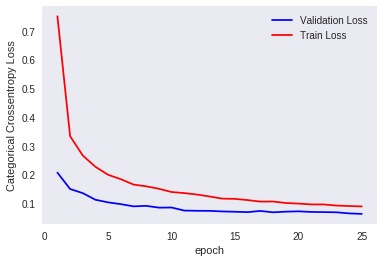

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history3.history['val_loss']
ty = history3.history['loss']
plt_dynamic(x, vy, ty, ax)

Thus, with dropout the accuracy decreases slightly but train and validation loss are very close to one another. Thus, dropout reduces overfitting.

# Layer 5 Architecture

**Without Batchnorm and Dropout**

In [0]:
model_5layer=Sequential()
model_5layer.add(Dense(512,activation='relu',input_dim=input_dim,))
model_5layer.add(Dense(256,activation='relu'))
model_5layer.add(Dense(128,activation='relu'))
model_5layer.add(Dense(128,activation='relu'))
model_5layer.add(Dense(64,activation='relu'))
model_5layer.add(Dense(output_dim,activation='softmax'))
model_5layer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_75 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_76 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_77 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_78 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_79 (Dense)             (None, 10)                650       
Total params: 591,562
Trainable params: 591,562
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_5layer.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history5=model_5layer.fit(X_train,Y_train,batch_size=batch_size,verbose=1,epochs=nb_epoch,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 7s 113us/step - loss: 0.2500 - acc: 0.9243 - val_loss: 0.1170 - val_acc: 0.9641
Epoch 2/25
60000/60000 [==============================] - 4s 66us/step - loss: 0.0921 - acc: 0.9718 - val_loss: 0.0851 - val_acc: 0.9741
Epoch 3/25
60000/60000 [==============================] - 4s 66us/step - loss: 0.0604 - acc: 0.9811 - val_loss: 0.0823 - val_acc: 0.9751
Epoch 4/25
60000/60000 [==============================] - 4s 65us/step - loss: 0.0465 - acc: 0.9853 - val_loss: 0.0706 - val_acc: 0.9792
Epoch 5/25
60000/60000 [==============================] - 4s 65us/step - loss: 0.0370 - acc: 0.9887 - val_loss: 0.0758 - val_acc: 0.9794
Epoch 6/25
60000/60000 [==============================] - 4s 66us/step - loss: 0.0329 - acc: 0.9896 - val_loss: 0.0742 - val_acc: 0.9804
Epoch 7/25
60000/60000 [==============================] - 4s 65us/step - loss: 0.0252 - acc: 0.9920 - val_loss: 0.0844 - val_ac

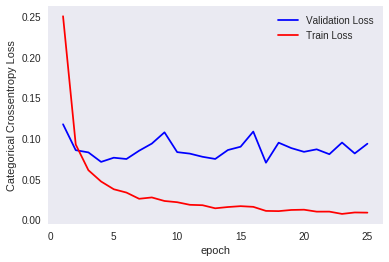

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history5.history['val_loss']
ty = history5.history['loss']
plt_dynamic(x, vy, ty, ax)

The training loss is smooth but the validation loss has a bumpy curve. The validation loss diverges from training loss and indicates that the model is overfitting.

**With Batchnorm and without Dropout**

In [0]:
model_5layer=Sequential()
model_5layer.add(Dense(512,activation='relu',input_dim=input_dim,))
model_5layer.add(BatchNormalization())
model_5layer.add(Dense(256,activation='relu'))
model_5layer.add(BatchNormalization())
model_5layer.add(Dense(128,activation='relu'))
model_5layer.add(BatchNormalization())
model_5layer.add(Dense(128,activation='relu'))
model_5layer.add(BatchNormalization())
model_5layer.add(Dense(64,activation='relu'))
model_5layer.add(BatchNormalization())
model_5layer.add(Dense(output_dim,activation='softmax'))
model_5layer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_36 (Batc (None, 512)               2048      
_________________________________________________________________
dense_81 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_37 (Batc (None, 256)               1024      
_________________________________________________________________
dense_82 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_38 (Batc (None, 128)               512       
_________________________________________________________________
dense_83 (Dense)             (None, 128)               16512     
__________

In [0]:
model_5layer.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history5=model_5layer.fit(X_train,Y_train,batch_size=batch_size,verbose=1,epochs=nb_epoch,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 12s 205us/step - loss: 0.2184 - acc: 0.9349 - val_loss: 0.1225 - val_acc: 0.9615
Epoch 2/25
60000/60000 [==============================] - 8s 140us/step - loss: 0.0890 - acc: 0.9725 - val_loss: 0.1009 - val_acc: 0.9703
Epoch 3/25
60000/60000 [==============================] - 8s 139us/step - loss: 0.0654 - acc: 0.9793 - val_loss: 0.0985 - val_acc: 0.9711
Epoch 4/25
60000/60000 [==============================] - 8s 140us/step - loss: 0.0481 - acc: 0.9850 - val_loss: 0.0991 - val_acc: 0.9698
Epoch 5/25
60000/60000 [==============================] - 8s 140us/step - loss: 0.0443 - acc: 0.9862 - val_loss: 0.0846 - val_acc: 0.9762
Epoch 6/25
60000/60000 [==============================] - 8s 140us/step - loss: 0.0401 - acc: 0.9868 - val_loss: 0.0843 - val_acc: 0.9764
Epoch 7/25
60000/60000 [==============================] - 8s 139us/step - loss: 0.0345 - acc: 0.9890 - val_loss: 0.0746 -

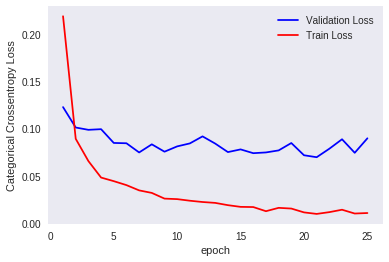

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history5.history['val_loss']
ty = history5.history['loss']
plt_dynamic(x, vy, ty, ax)

woah!! our traing and test loss go in opposite direction. It seems our model is heavily overfitted.

**With Batchnorm and Dropout**

In [0]:
model_5layer=Sequential()
model_5layer.add(Dense(512,activation='relu',input_dim=input_dim,))
model_5layer.add(BatchNormalization())
model_5layer.add(Dropout(0.5))
model_5layer.add(Dense(256,activation='relu'))
model_5layer.add(BatchNormalization())
model_5layer.add(Dropout(0.5))
model_5layer.add(Dense(128,activation='relu'))
model_5layer.add(BatchNormalization())
model_5layer.add(Dropout(0.5))
model_5layer.add(Dense(128,activation='relu'))
model_5layer.add(BatchNormalization())
model_5layer.add(Dropout(0.5))
model_5layer.add(Dense(64,activation='relu'))
model_5layer.add(BatchNormalization())
model_5layer.add(Dropout(0.5))
model_5layer.add(Dense(output_dim,activation='softmax'))
model_5layer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_41 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_42 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 128)               32896     
__________

In [0]:
model_5layer.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history5=model_5layer.fit(X_train,Y_train,batch_size=batch_size,verbose=1,epochs=nb_epoch,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 13s 223us/step - loss: 1.1768 - acc: 0.6299 - val_loss: 0.2483 - val_acc: 0.9294
Epoch 2/25
60000/60000 [==============================] - 9s 148us/step - loss: 0.4169 - acc: 0.8847 - val_loss: 0.1695 - val_acc: 0.9516
Epoch 3/25
60000/60000 [==============================] - 9s 149us/step - loss: 0.2998 - acc: 0.9211 - val_loss: 0.1403 - val_acc: 0.9594
Epoch 4/25
60000/60000 [==============================] - 9s 148us/step - loss: 0.2542 - acc: 0.9348 - val_loss: 0.1280 - val_acc: 0.9677
Epoch 5/25
60000/60000 [==============================] - 9s 148us/step - loss: 0.2205 - acc: 0.9433 - val_loss: 0.1193 - val_acc: 0.9690
Epoch 6/25
60000/60000 [==============================] - 9s 147us/step - loss: 0.2027 - acc: 0.9490 - val_loss: 0.1039 - val_acc: 0.9724
Epoch 7/25
60000/60000 [==============================] - 9s 148us/step - loss: 0.1856 - acc: 0.9531 - val_loss: 0.1112 -

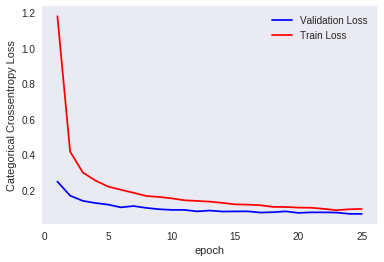

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history5.history['val_loss']
ty = history5.history['loss']
plt_dynamic(x, vy, ty, ax)

Even after applying dropout we see that our train and validation loss converge. Thus the model is not overfitting.

**Trying a different dropuout rate**

In [0]:
model_5layer=Sequential()
model_5layer.add(Dense(512,activation='relu',input_dim=input_dim,))
model_5layer.add(BatchNormalization())
model_5layer.add(Dropout(0.7))
model_5layer.add(Dense(256,activation='relu'))
model_5layer.add(BatchNormalization())
model_5layer.add(Dropout(0.7))
model_5layer.add(Dense(128,activation='relu'))
model_5layer.add(BatchNormalization())
model_5layer.add(Dropout(0.7))
model_5layer.add(Dense(128,activation='relu'))
model_5layer.add(BatchNormalization())
model_5layer.add(Dropout(0.7))
model_5layer.add(Dense(64,activation='relu'))
model_5layer.add(BatchNormalization())
model_5layer.add(Dropout(0.7))
model_5layer.add(Dense(output_dim,activation='softmax'))
model_5layer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_46 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_47 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 128)               32896     
__________

In [0]:
model_5layer.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history5=model_5layer.fit(X_train,Y_train,batch_size=batch_size,verbose=1,epochs=nb_epoch,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 14s 236us/step - loss: 2.5421 - acc: 0.1952 - val_loss: 1.6784 - val_acc: 0.4748
Epoch 2/25
60000/60000 [==============================] - 9s 146us/step - loss: 1.5099 - acc: 0.4418 - val_loss: 0.8394 - val_acc: 0.7243
Epoch 3/25
60000/60000 [==============================] - 9s 149us/step - loss: 1.0685 - acc: 0.6085 - val_loss: 0.5786 - val_acc: 0.8367
Epoch 4/25
60000/60000 [==============================] - 9s 148us/step - loss: 0.8530 - acc: 0.7070 - val_loss: 0.4272 - val_acc: 0.8908
Epoch 5/25
60000/60000 [==============================] - 9s 148us/step - loss: 0.7158 - acc: 0.7708 - val_loss: 0.3231 - val_acc: 0.9244
Epoch 6/25
60000/60000 [==============================] - 9s 149us/step - loss: 0.6231 - acc: 0.8122 - val_loss: 0.2635 - val_acc: 0.9367
Epoch 7/25
60000/60000 [==============================] - 9s 149us/step - loss: 0.5469 - acc: 0.8442 - val_loss: 0.2270 -

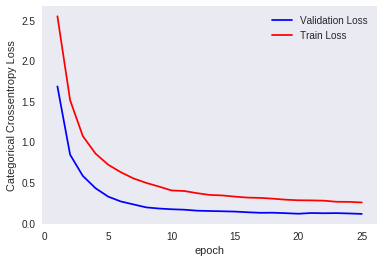

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history5.history['val_loss']
ty = history5.history['loss']
plt_dynamic(x, vy, ty, ax)

We have tried various MLP architectures on MNIST data and seen how they perform in terms of thier accuracy and train vs val loss. We also saw the distribution of weights and how it changes with Batchnorm.

In [1]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Architecture","Dropout applied?","BatchNorm applied?","Test Loss","Test Accuracy"]
x.add_row(["2 Layer", "No","No",0.0895,0.9832])
x.add_row(["2 Layer", "Yes","No",0.0840,0.9809])
x.add_row(["2 Layer", "Yes","Yes",0.0580,0.9824])
x.add_row(["3 Layer", "No","No",0.1244,0.9768])
x.add_row(["3 Layer", "Yes","No",0.0803,0.9813])
x.add_row(["3 Layer", "Yes","Yes",0.0623,0.9823])
x.add_row(["5 Layer", "No","No",0.0930,0.9809])
x.add_row(["5 Layer", "Yes","No",0.0895,0.9788])
x.add_row(["5 Layer", "Yes","Yes",0.0670,0.9839])
print(x)

+--------------+------------------+--------------------+-----------+---------------+
| Architecture | Dropout applied? | BatchNorm applied? | Test Loss | Test Accuracy |
+--------------+------------------+--------------------+-----------+---------------+
|   2 Layer    |        No        |         No         |   0.0895  |     0.9832    |
|   2 Layer    |       Yes        |         No         |   0.084   |     0.9809    |
|   2 Layer    |       Yes        |        Yes         |   0.058   |     0.9824    |
|   3 Layer    |        No        |         No         |   0.1244  |     0.9768    |
|   3 Layer    |       Yes        |         No         |   0.0803  |     0.9813    |
|   3 Layer    |       Yes        |        Yes         |   0.0623  |     0.9823    |
|   5 Layer    |        No        |         No         |   0.093   |     0.9809    |
|   5 Layer    |       Yes        |         No         |   0.0895  |     0.9788    |
|   5 Layer    |       Yes        |        Yes         |   0.067 